Predicting the Machine failure

Target column y

y=1 There is anomaly;
y=0 There is no anomaly

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data

In [34]:
df=pd.read_excel("/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/data/AnomaData.xlsx")

In [6]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

finding the missing values

In [9]:
print(df.isnull().sum()/len(df))

time    0.0
y       0.0
x1      0.0
x2      0.0
x3      0.0
       ... 
x57     0.0
x58     0.0
x59     0.0
x60     0.0
y.1     0.0
Length: 62, dtype: float64


There are no missing values

Removing column y.1 and 'time'

In [35]:
df.drop(columns=['time','y.1'],inplace=True)

Understanding the distribution of x19 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


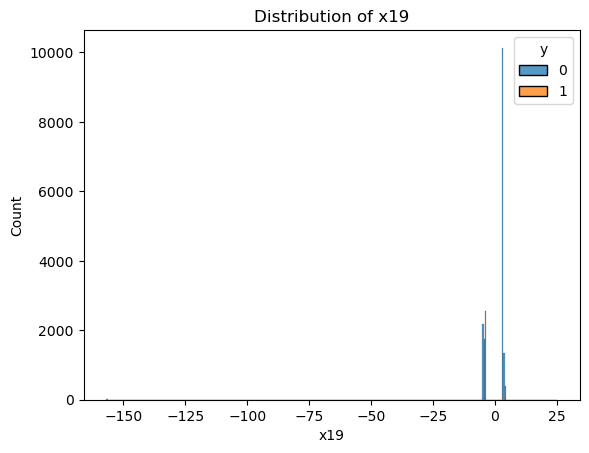

In [25]:
sns.histplot(data=df,x='x19',hue='y',multiple='stack', kde=False)
plt.title("Distribution of x19")
plt.show()

The plot is stretched because of the outliers

Splitting features and target

In [36]:
X=df.drop(columns=['y'])
y=df['y']                

Scaling the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [37]:
numerical_transformer=StandardScaler()

In [38]:
X_Scaled=numerical_transformer.fit_transform(X)

Splitting the data for training and testing

In [30]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y, test_size=0.2, random_state=42)

Copying the data to data folder

In [43]:
X_train=pd.DataFrame(data=X_train,columns=X.columns)
X_test=pd.DataFrame(data=X_test,columns=X.columns)
y_train=pd.DataFrame(data=y_train)
y_test=pd.DataFrame(data=y_test)

In [45]:
X_train.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/data/X_train.csv")
X_test.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/data/X_test.csv")
y_train.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/data/y_train.csv")
y_test.to_csv("/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/data/y_test.csv")

Modeling using random forest classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [47]:
rf = RandomForestClassifier(random_state=42)

In [48]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],  # Number of trees
    'max_depth': [None, 10, 20, 30],     # Maximum depth of the trees
    'min_samples_split': [0.025,0.05,0.1,0.25,0.5],     # Minimum number of samples to split an internal node     
    'bootstrap': [True, False]           # Whether bootstrap samples are used when building trees
}

In [49]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=10, 
                               cv=3, verbose=2, random_state=42, n_jobs=-1)

In [50]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_split': [0.025, 0.05, 0.1,
                                                              0.25, 0.5],
                                        'n_estimators': [10, 20, 50, 100]},
                   random_state=42, verbose=2)

[CV] END bootstrap=False, max_depth=10, min_samples_split=0.05, n_estimators=20; total time=   2.4s
[CV] END bootstrap=False, max_depth=30, min_samples_split=0.025, n_estimators=20; total time=   3.2s
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.25, n_estimators=100; total time=   8.7s
[CV] END bootstrap=True, max_depth=10, min_samples_split=0.1, n_estimators=20; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.025, n_estimators=20; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.025, n_estimators=20; total time=   2.3s
[CV] END bootstrap=True, max_depth=20, min_samples_split=0.1, n_estimators=100; total time=   9.2s
[CV] END bootstrap=False, max_depth=10, min_samples_split=0.05, n_estimators=20; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, min_samples_split=0.025, n_estimators=20; total time=   3.1s
[CV] END bootstrap=False, max_depth=None, min_samples_split=0.25, n_estimators=50; total time=   8.

Finding the best parameters

In [51]:
best_params = rf_random.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'n_estimators': 10, 'min_samples_split': 0.1, 'max_depth': 10, 'bootstrap': False}


Fitting the best model

In [52]:
best_rf = rf_random.best_estimator_

Checking the accuracy of test and train data

In [53]:
y_pred_test = best_rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test}")
y_pred_train=best_rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f"Accuracy on the train set: {accuracy_train}")

Accuracy on the test set: 0.9953804347826087
Accuracy on the train set: 0.9938850387280881


We can see accuracy over 99% for both test and train data

Saving the model

In [54]:
import joblib

In [55]:
joblib.dump(best_rf, "/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/model/best_random_forest_model.pkl")

['/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/model/best_random_forest_model.pkl']

Load the model for testing again

In [56]:
best_rf_loaded = joblib.load('/Users/kuriankgeorge/Desktop/aws/Capstone/01_Anoma/model/best_random_forest_model.pkl')

In [57]:
y_pred_test = best_rf_loaded.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test}")

Accuracy on the test set: 0.9953804347826087
